In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

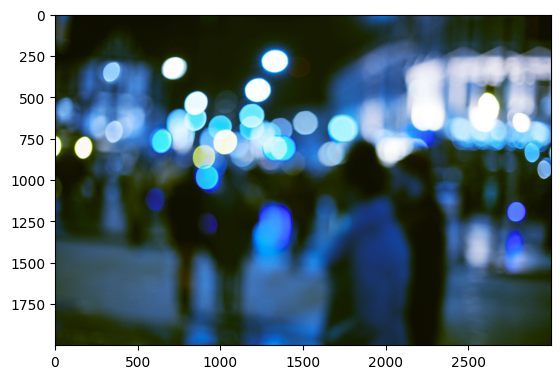

In [4]:
path = "./blur.jpeg"
img = cv2.imread(path)
plt.imshow(img)

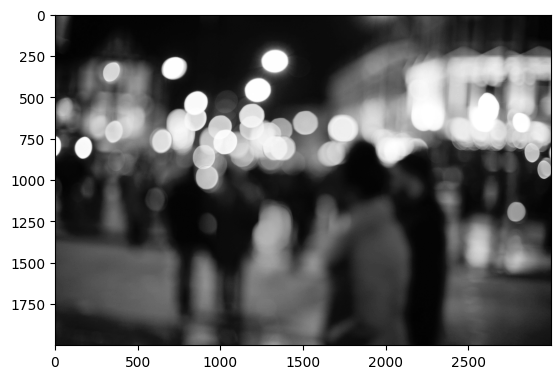

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

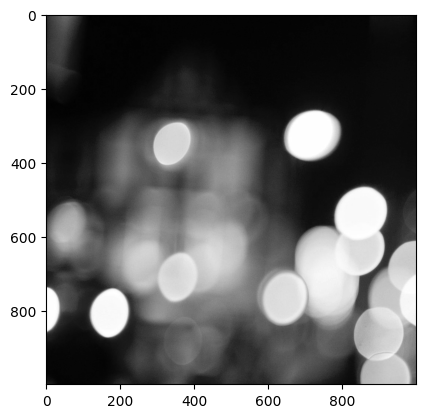

In [28]:
gray = gray[:1000, :1000]
plt.imshow(gray, cmap="gray")

In [90]:
def apply_filter(image, kernel):
    height, width = image.shape
    filtered_image = np.zeros((height, width))
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i-1:i+2, j-1:j+2]
            
            new_value = np.sum(region * kernel)
            
            filtered_image[i, j] = new_value
    return filtered_image

filter = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
laplacian = apply_filter(gray, filter)
print(laplacian)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. -2. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ... -3. -4.  0.]
 [ 0.  2.  0. ...  4.  4.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


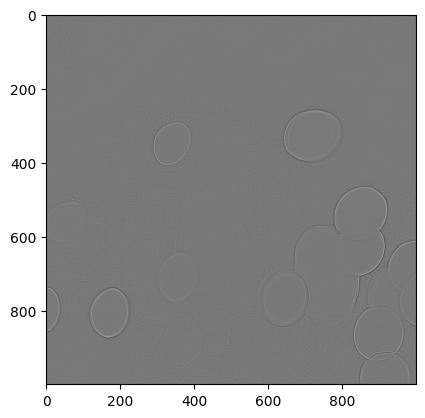

In [92]:
plt.imshow(laplacian, cmap="gray")

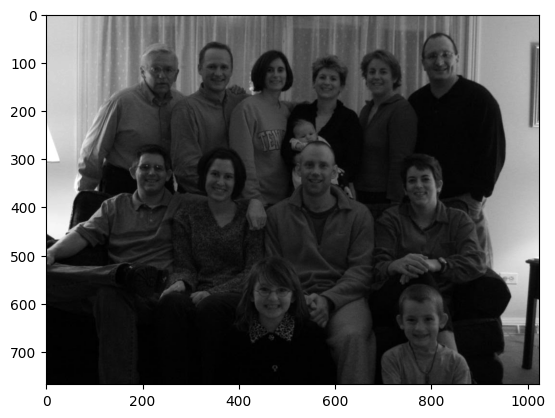

In [49]:
im = cv2.imread("./img1.jpg")
gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gr, cmap="gray")

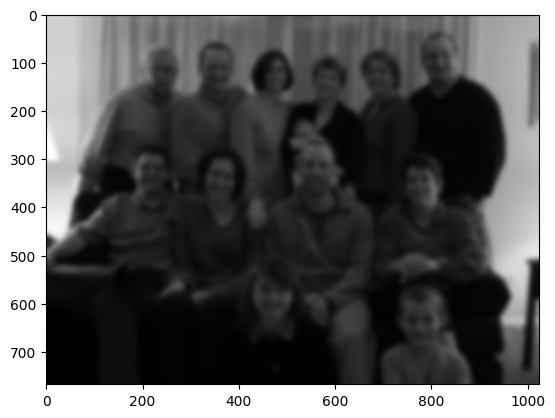

In [67]:
blurred_image = cv2.GaussianBlur(gr, (33, 33), 0)
plt.imshow(blurred_image, cmap="gray")

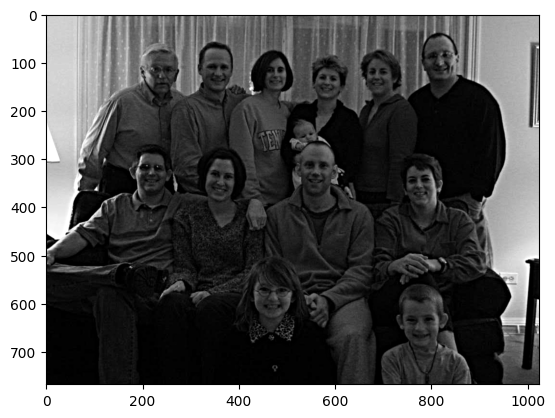

In [68]:
hb = cv2.addWeighted(gr, 2, blurred_image, -1, 0)
plt.imshow(hb, cmap="gray")

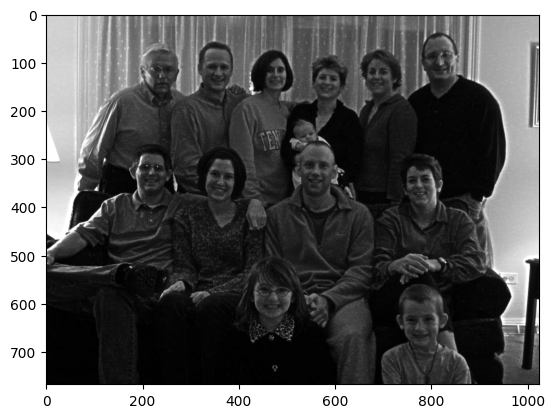

In [69]:
mask = cv2.subtract(gr, blurred_image)
k = 1.5
sharpened = cv2.addWeighted(gr, 1.0, mask, k, 0)
plt.imshow(sharpened, cmap="gray")

In [80]:
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

cross_correlation = apply_filter(gr, kernel)

convolution = apply_filter(gr, cv2.flip(kernel, -1))

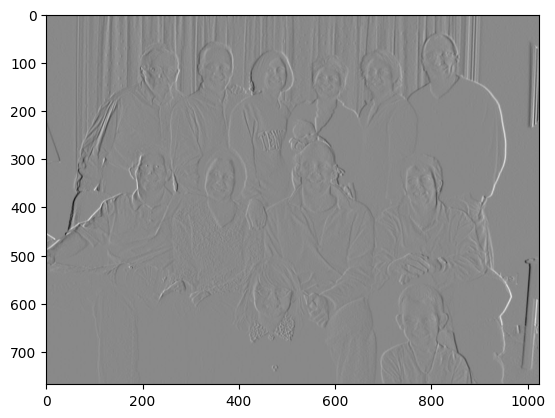

In [81]:
plt.imshow(cross_correlation, cmap="gray")

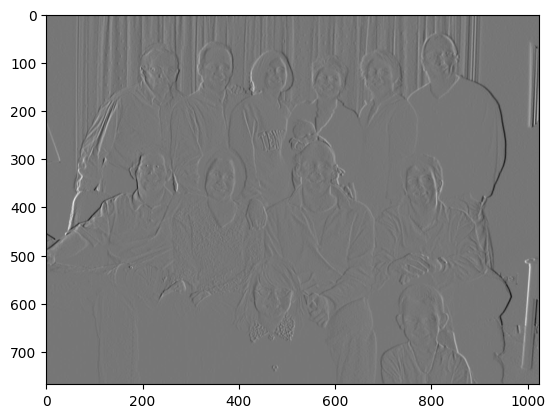

In [82]:
plt.imshow(convolution, cmap="gray")

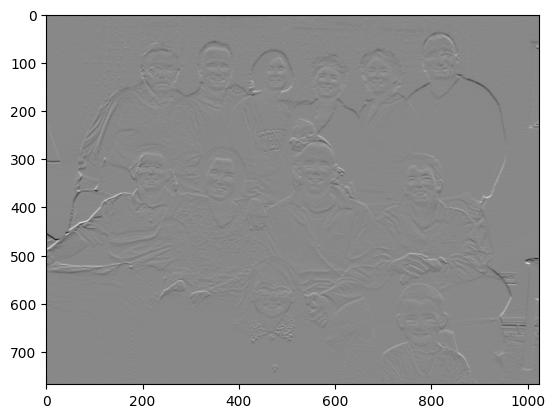

In [87]:
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]], dtype=np.float32)

hz = apply_filter(gr, kernel)
plt.imshow(hz, cmap="gray")

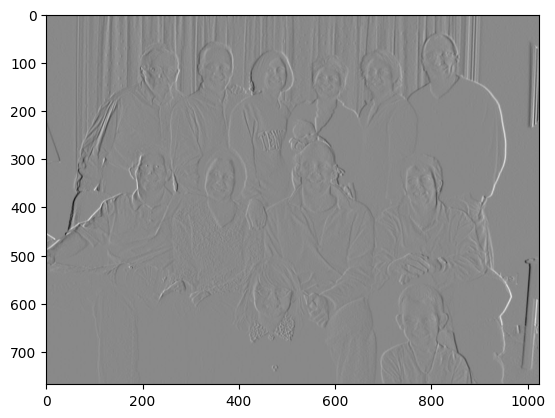

In [89]:
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

vr = apply_filter(gr, kernel)
plt.imshow(vr, cmap="gray")